# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading DataSet

In [3]:
df = pd.read_csv('L2T2_WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Summary Statistics

In [4]:
# Exploring the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Summary statistics
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000         

# Handling Missing Data

In [6]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Correlation Matrix

In [7]:
# Correlation matrix
correlation_matrix = df.corr()

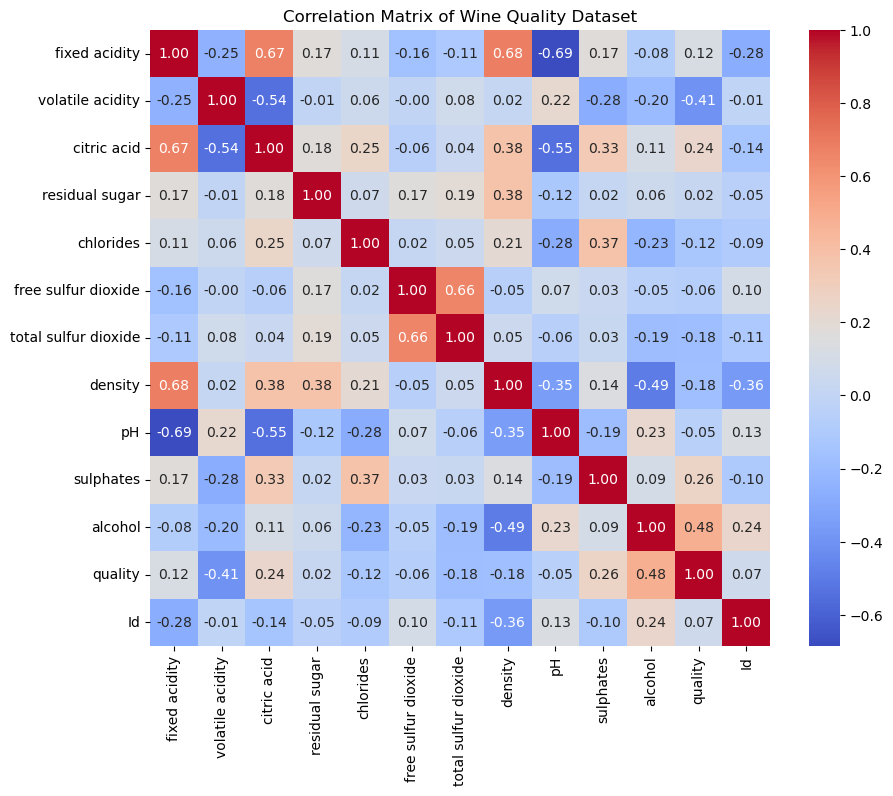

In [8]:
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

# Selecting Relevant Features

In [9]:

# Select relevant features
selected_features = ['fixed acidity', 'volatile acidity', 'density', 'pH', 'alcohol', 'quality']


In [10]:
# Filter the dataframe to only keep the selected features
df_selected = df[selected_features]

# Correlation Matrix

In [11]:
# Correlation matrix for the selected features
correlation_matrix_selected = df_selected.corr()


In [12]:
# Print correlation matrix to analyze relationships
print("Correlation Matrix (Selected Features):\n", correlation_matrix_selected)


Correlation Matrix (Selected Features):
                   fixed acidity  volatile acidity   density        pH  \
fixed acidity          1.000000         -0.250728  0.681501 -0.685163   
volatile acidity      -0.250728          1.000000  0.016512  0.221492   
density                0.681501          0.016512  1.000000 -0.352775   
pH                    -0.685163          0.221492 -0.352775  1.000000   
alcohol               -0.075055         -0.203909 -0.494727  0.225322   
quality                0.121970         -0.407394 -0.175208 -0.052453   

                   alcohol   quality  
fixed acidity    -0.075055  0.121970  
volatile acidity -0.203909 -0.407394  
density          -0.494727 -0.175208  
pH                0.225322 -0.052453  
alcohol           1.000000  0.484866  
quality           0.484866  1.000000  


# Visualization:

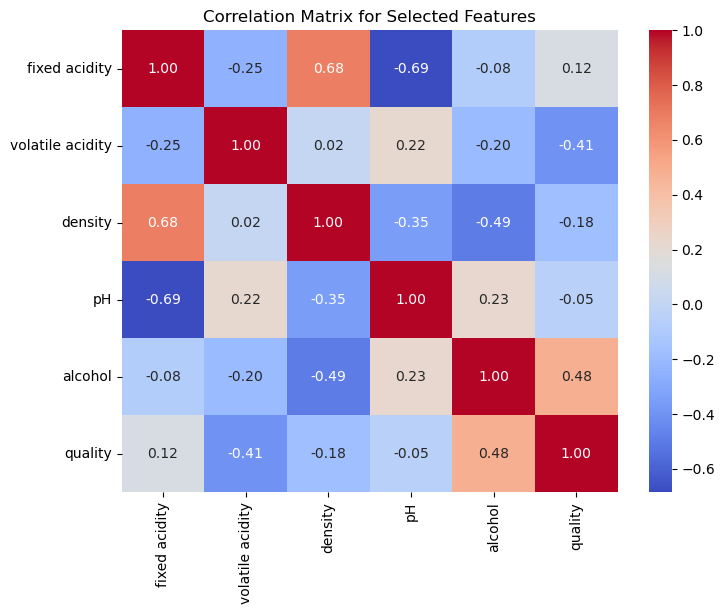

In [13]:
# Plotting the heatmap for selected features' correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Features')
plt.show()

# Normalization/Scaling:
Splitting the Data:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features for scaling
features = ['fixed acidity', 'volatile acidity', 'density', 'pH', 'alcohol']
target = 'quality'

# Separating the features (X) and target variable (y)
X = df[features]
y = df[target]

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shape of the train and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (914, 5)
Testing set shape: (229, 5)


# Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)


Random Forest Classifier Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.67      0.65      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.66      0.69      0.68       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 64  7  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]


C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

# Hyperparameter Tuning:

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
365 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.61


# Stochastic Gradient Descent (SGD) Classifier

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SGDClassifier with L2 regularization (Ridge)
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', random_state=42)

# Train the model on the training data
sgd_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_sgd = sgd_classifier.predict(X_test)

# Evaluate the model performance
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
classification_report_sgd = classification_report(y_test, y_pred_sgd)
confusion_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Print the results
print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")
print("Classification Report:\n", classification_report_sgd)
print("Confusion Matrix:\n", confusion_matrix_sgd)


SGD Classifier Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.52      0.68      0.59        96
           6       0.50      0.45      0.48        99
           7       0.57      0.31      0.40        26
           8       0.00      0.00      0.00         2

    accuracy                           0.52       229
   macro avg       0.27      0.24      0.24       229
weighted avg       0.50      0.52      0.50       229

Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  3  3  0  0]
 [ 1  0 65 29  1  0]
 [ 0  0 49 45  5  0]
 [ 0  0  7 11  8  0]
 [ 0  0  0  2  0  0]]


C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
sgd_classifier_l1 = SGDClassifier(loss='hinge', penalty='l1', random_state=42)  # L1 Regularization
sgd_classifier_en = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=42)  # ElasticNet


# Support Vector Classifier (SVC)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVC with RBF kernel (default)
svc_classifier = SVC(kernel='rbf', random_state=42)

# Train the model on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the model performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Print the results
print(f"SVC Accuracy: {accuracy_svc:.2f}")
print("Classification Report:\n", classification_report_svc)
print("Confusion Matrix:\n", confusion_matrix_svc)


SVC Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.75      0.70        96
           6       0.56      0.60      0.58        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.35      0.32      0.33       229
weighted avg       0.58      0.60      0.58       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 34 59  6  0]
 [ 0  1 18  7  0]
 [ 0  0  2  0  0]]


C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [20]:
svc_classifier_linear = SVC(kernel='linear', random_state=42)


In [21]:
svc_classifier_poly = SVC(kernel='poly', degree=3, random_state=42)


In [22]:
svc_classifier_rbf = SVC(kernel='rbf', random_state=42)


# Model Evaluation with Accuracy, Precision, Recall, F1-Score, Confusion Matrix, and Cross-Validation

C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Us

Random Forest Performance Metrics:
Accuracy: 0.69
Precision: 0.67
Recall: 0.69
F1-Score: 0.68
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229



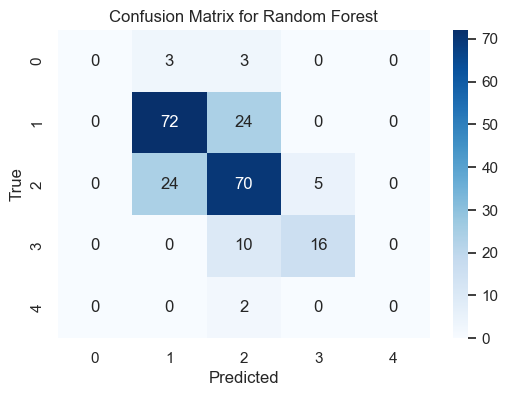

Cross-validation Scores for Random Forest: [0.64480874 0.66120219 0.69945355 0.69945355 0.5989011 ]
Mean Cross-validation Score: 0.66
SGD Classifier Performance Metrics:
Accuracy: 0.59
Precision: 0.61
Recall: 0.59
F1-Score: 0.57
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229



C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Us

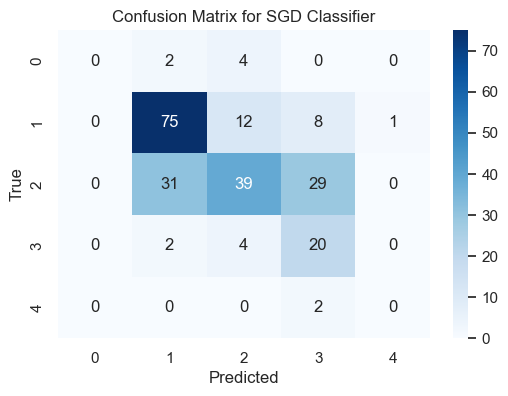

Cross-validation Scores for SGD Classifier: [0.49726776 0.52459016 0.53551913 0.54098361 0.46153846]
Mean Cross-validation Score: 0.51
SVC Performance Metrics:
Accuracy: 0.66
Precision: 0.64
Recall: 0.66
F1-Score: 0.64
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229



C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Us

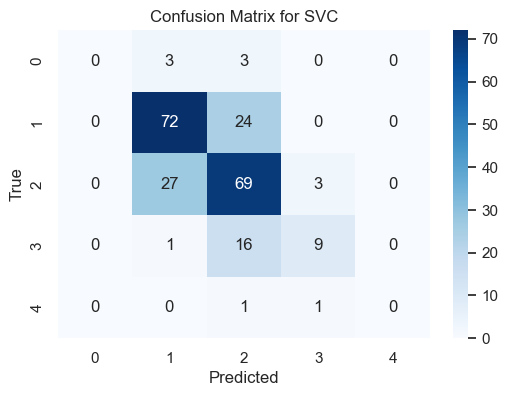

Cross-validation Scores for SVC: [0.63387978 0.59562842 0.63934426 0.62295082 0.56043956]
Mean Cross-validation Score: 0.61


In [34]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('path_to_your_file.csv')
# Here we assume 'df' is already your DataFrame

# Define features and target variable
X = df.drop('quality', axis=1)  # Replace 'quality' with your target column name
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)
svc_classifier = SVC(random_state=42)

# Fit the classifiers
rf_classifier.fit(X_train_scaled, y_train)
sgd_classifier.fit(X_train_scaled, y_train)
svc_classifier.fit(X_train_scaled, y_train)

# Function to evaluate model performance
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to perform cross-validation
def cross_validation(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation Scores for {model_name}: {cv_scores}")
    print(f"Mean Cross-validation Score: {cv_scores.mean():.2f}")

# Evaluate Random Forest
y_pred_rf = rf_classifier.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Cross-validation for Random Forest
cross_validation(rf_classifier, X_train_scaled, y_train, "Random Forest")

# Evaluate SGD Classifier
y_pred_sgd = sgd_classifier.predict(X_test_scaled)
evaluate_model(y_test, y_pred_sgd, "SGD Classifier")

# Cross-validation for SGD Classifier
cross_validation(sgd_classifier, X_train_scaled, y_train, "SGD Classifier")

# Evaluate SVC
y_pred_svc = svc_classifier.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svc, "SVC")

# Cross-validation for SVC
cross_validation(svc_classifier, X_train_scaled, y_train, "SVC")


# Data Visualization

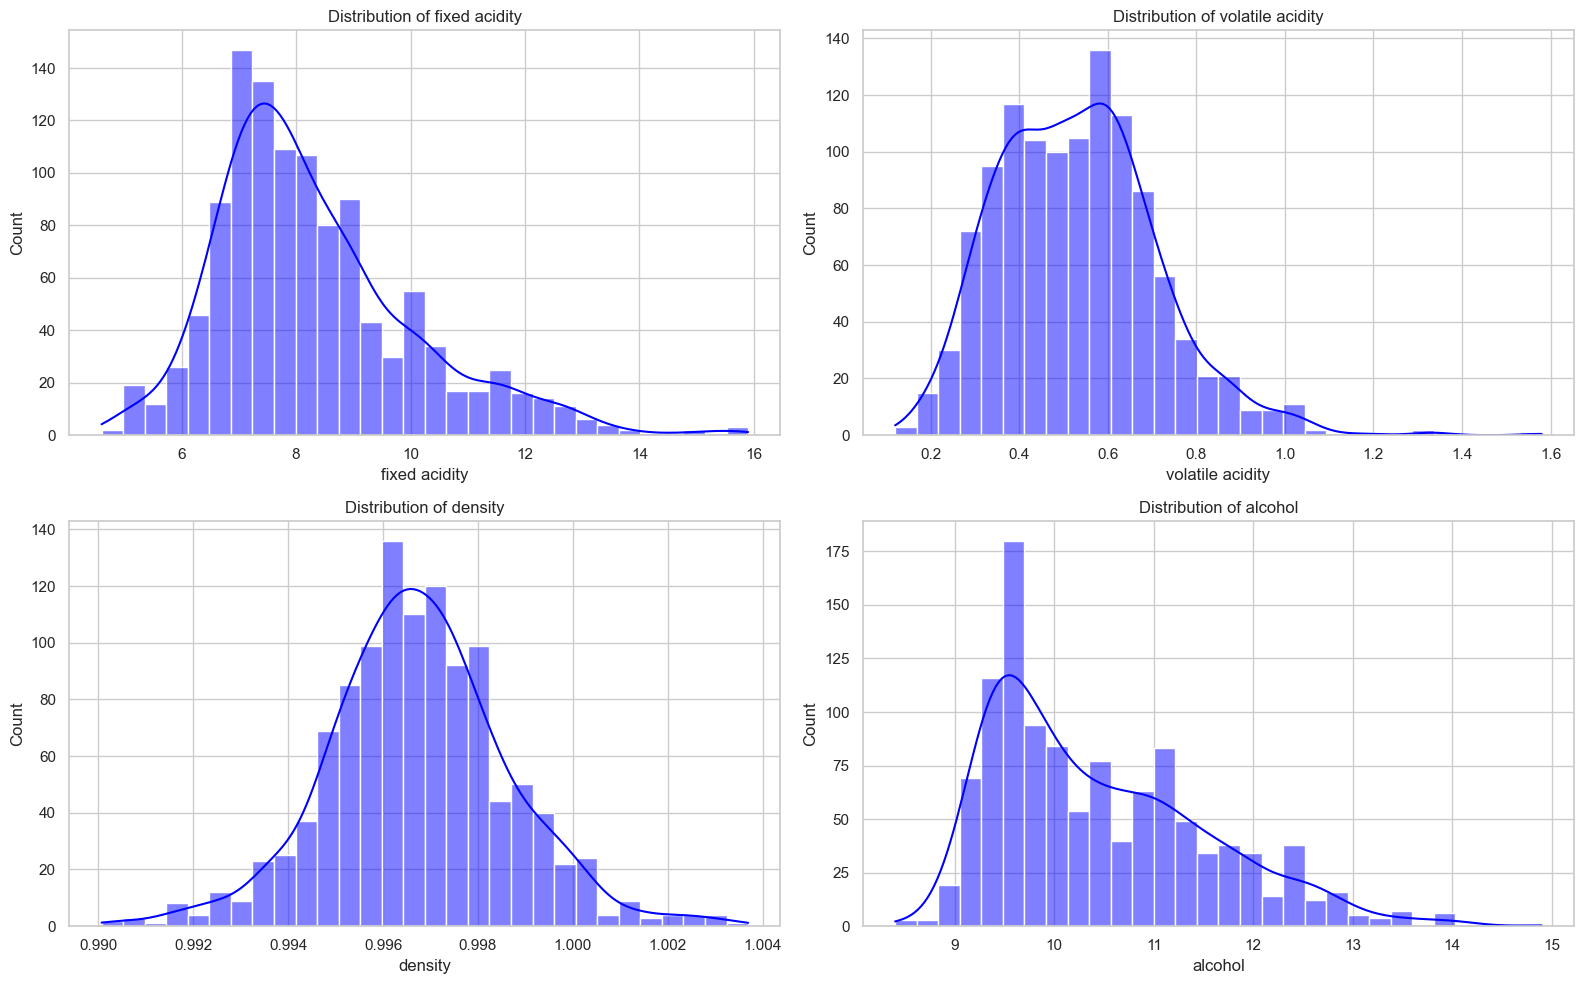

C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


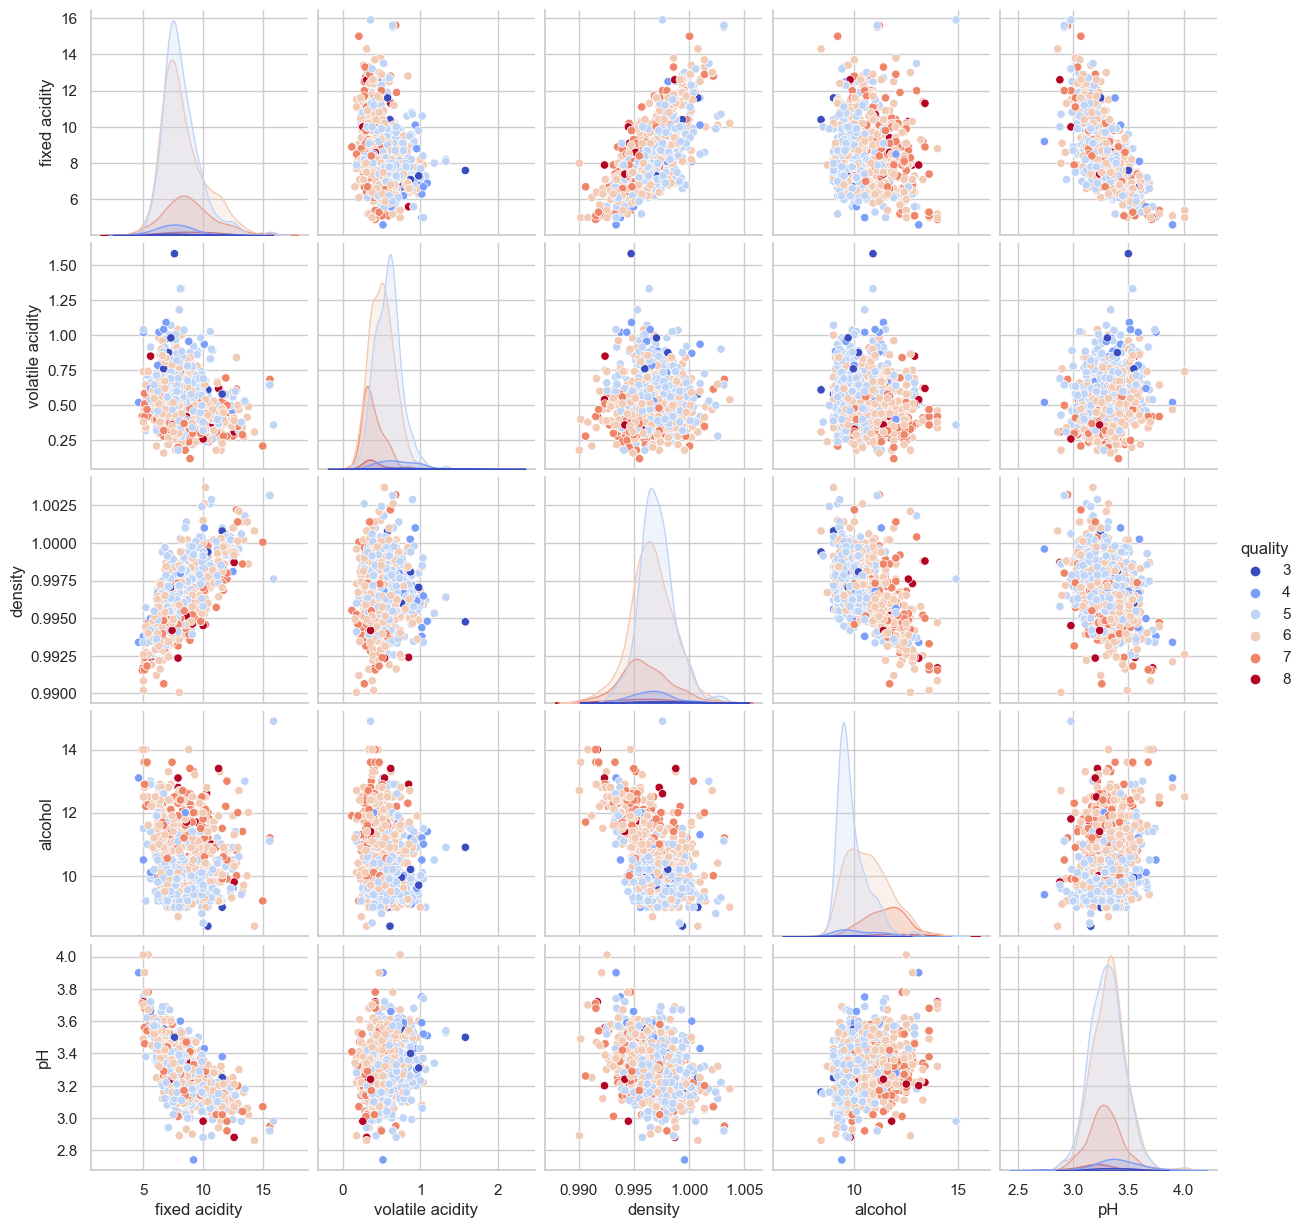

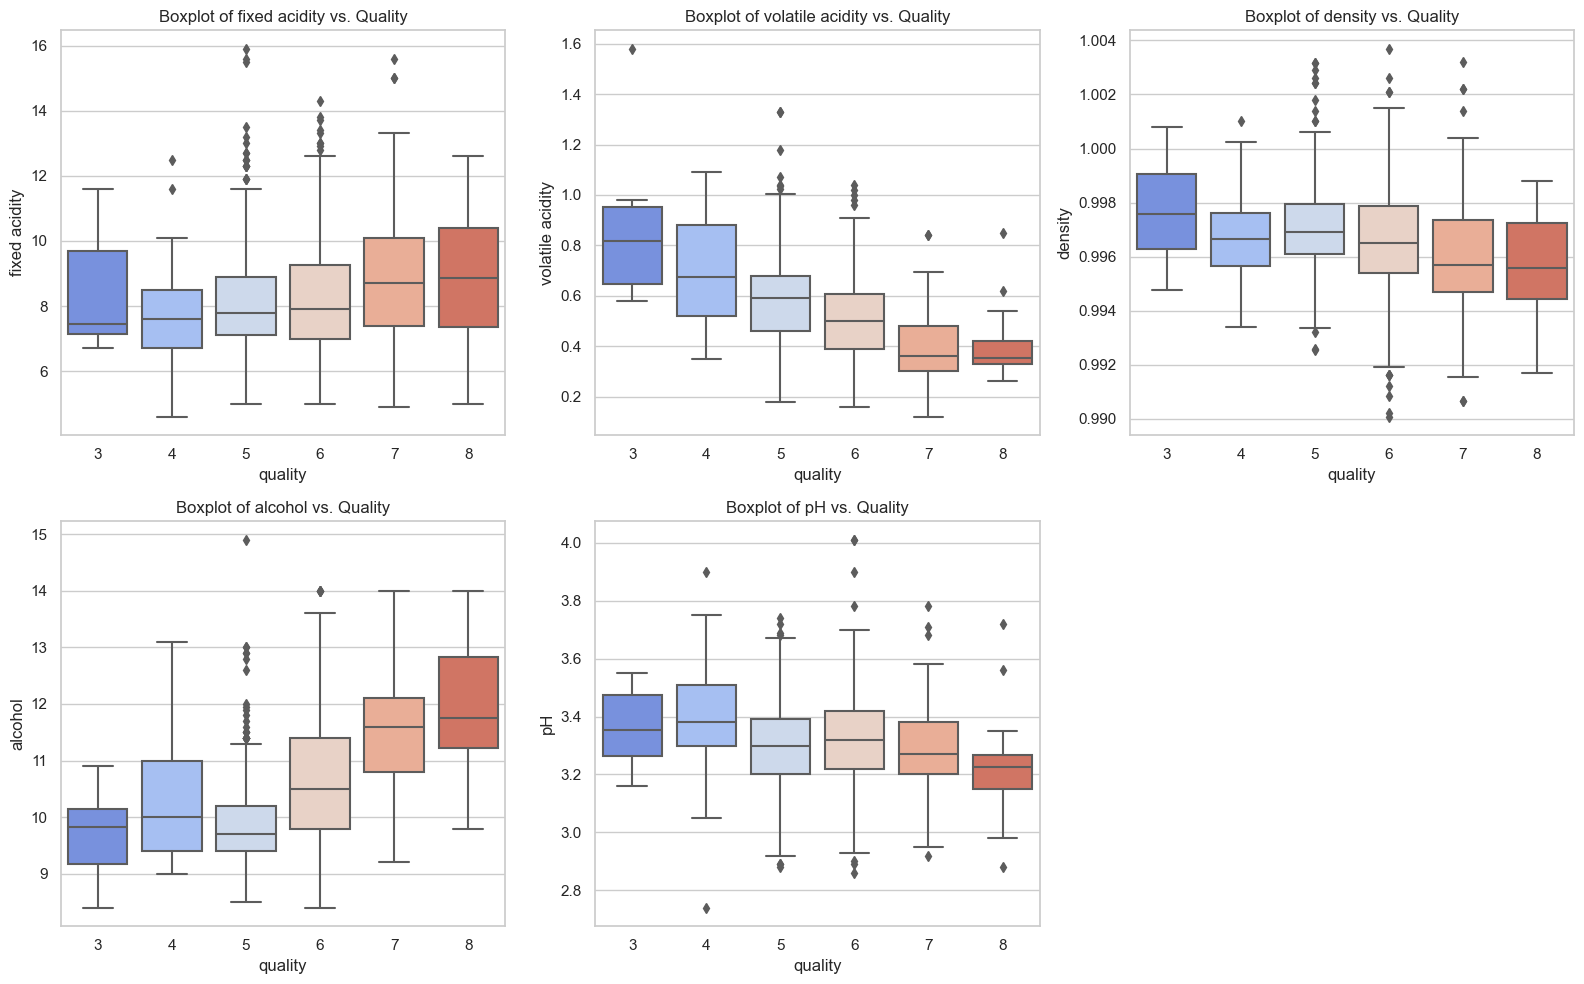

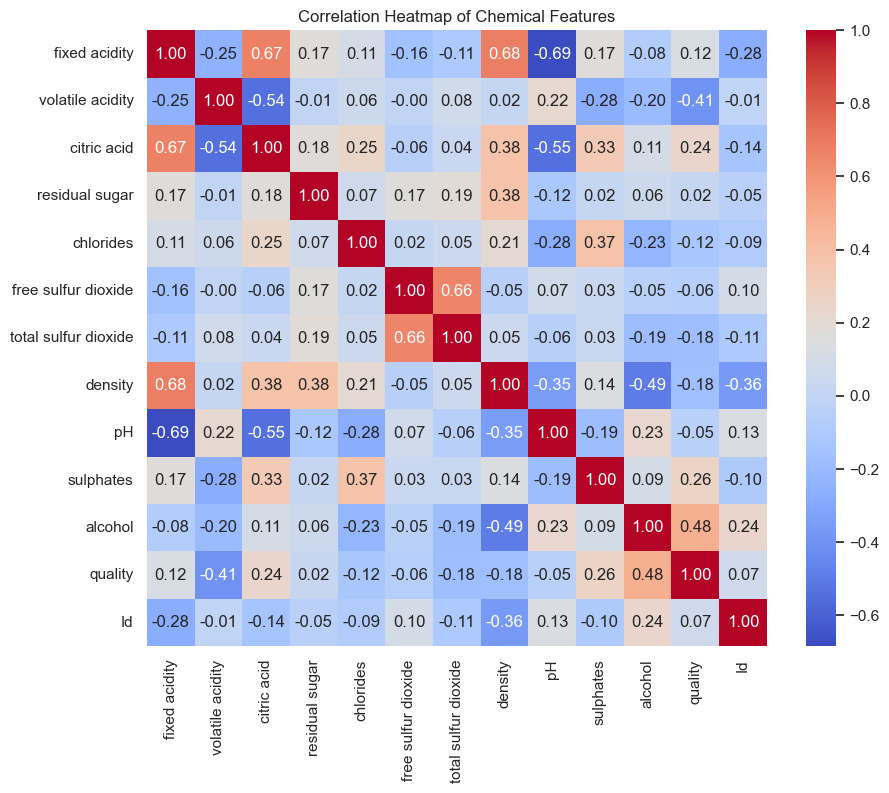

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# Feature Distribution: Plot the distribution of acidity, density, and alcohol content
def plot_feature_distributions(df):
    features = ['fixed acidity', 'volatile acidity', 'density', 'alcohol']
    plt.figure(figsize=(16, 10))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[feature], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {feature}')
    
    plt.tight_layout()
    plt.show()

plot_feature_distributions(df)

# Pair Plot: Visualize relationships between pairs of selected features
def plot_pairplot(df):
    selected_features = ['fixed acidity', 'volatile acidity', 'density', 'alcohol', 'pH', 'quality']
    sns.pairplot(df[selected_features], hue="quality", palette="coolwarm")
    plt.show()

plot_pairplot(df)

# Boxplot: Visualize variation in chemical qualities across different wine quality ratings
def plot_boxplot(df):
    plt.figure(figsize=(16, 10))
    features = ['fixed acidity', 'volatile acidity', 'density', 'alcohol', 'pH']
    
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='quality', y=feature, data=df, palette="coolwarm")
        plt.title(f'Boxplot of {feature} vs. Quality')
    
    plt.tight_layout()
    plt.show()

plot_boxplot(df)

# Heatmap: Display correlation matrix between chemical features and quality ratings
def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Chemical Features')
    plt.show()

plot_correlation_heatmap(df)


# Conclusion

In [31]:
def model_comparison():
    # Display summary of model performance based on evaluation metrics
    print("=== Model Comparison ===")
    
    # Assuming these are the accuracy scores from previous evaluations
    models = ['Random Forest', 'SGD Classifier', 'SVC']
    accuracies = [accuracy_rf, accuracy_sgd, accuracy_svc]
    precisions = [precision_score(y_test, y_pred_rf, average='weighted'),
                  precision_score(y_test, y_pred_sgd, average='weighted'),
                  precision_score(y_test, y_pred_svc, average='weighted')]
    recalls = [recall_score(y_test, y_pred_rf, average='weighted'),
               recall_score(y_test, y_pred_sgd, average='weighted'),
               recall_score(y_test, y_pred_svc, average='weighted')]
    f1_scores = [f1_score(y_test, y_pred_rf, average='weighted'),
                 f1_score(y_test, y_pred_sgd, average='weighted'),
                 f1_score(y_test, y_pred_svc, average='weighted')]
    
    # Summary of metrics
    for i, model in enumerate(models):
        print(f"\nModel: {model}")
        print(f"Accuracy: {accuracies[i]:.2f}")
        print(f"Precision: {precisions[i]:.2f}")
        print(f"Recall: {recalls[i]:.2f}")
        print(f"F1-Score: {f1_scores[i]:.2f}")
    
    # Find the best model based on accuracy
    best_model_idx = accuracies.index(max(accuracies))
    print(f"\nThe best performing model is: {models[best_model_idx]} with an accuracy of {max(accuracies):.2f}")

def chemical_insights(df):
    # Display insights about how chemical qualities affect wine quality
    print("\n=== Insights on Chemical Qualities and Wine Quality ===")
    
    correlation_matrix = df.corr()
    
    # Look at the correlations between features and the 'quality' column
    correlations_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
    print("Correlation of chemical qualities with wine quality:\n")
    print(correlations_with_quality)
    
    # Provide insights based on the correlations
    print("\nKey Insights:")
    if correlations_with_quality['alcohol'] > 0.3:
        print("- Higher alcohol content is positively correlated with wine quality.")
    if correlations_with_quality['density'] < -0.3:
        print("- Lower density correlates with higher wine quality.")
    if correlations_with_quality['volatile acidity'] < -0.3:
        print("- Higher volatile acidity is negatively correlated with wine quality, likely reducing quality.")
    # You can add more insights depending on other correlations

def next_steps():
    # Suggest future improvements and next steps
    print("\n=== Future Improvements ===")
    print("1. **Additional Features**: Explore more chemical or environmental factors that may affect wine quality, such as temperature during fermentation.")
    print("2. **Hyperparameter Tuning**: Further improve models with hyperparameter tuning, especially for Random Forest and SVC using GridSearchCV or RandomizedSearchCV.")
    print("3. **Different Classifiers**: Try additional classifiers such as Gradient Boosting or XGBoost to compare performance.")
    print("4. **Feature Engineering**: Investigate interaction terms between chemical features or non-linear transformations.")
    print("5. **Cross-validation**: Implement stratified k-fold cross-validation to ensure balanced representation of wine quality classes in all folds.")

# Execute the conclusion steps
model_comparison()
chemical_insights(df)
next_steps()


=== Model Comparison ===

Model: Random Forest
Accuracy: 0.69
Precision: 0.66
Recall: 0.69
F1-Score: 0.68

Model: SGD Classifier
Accuracy: 0.52
Precision: 0.50
Recall: 0.52
F1-Score: 0.50

Model: SVC
Accuracy: 0.60
Precision: 0.58
Recall: 0.60
F1-Score: 0.58

The best performing model is: Random Forest with an accuracy of 0.69

=== Insights on Chemical Qualities and Wine Quality ===
Correlation of chemical qualities with wine quality:

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

Key Insights:
- Higher alcohol content is positively correlated with wine quality.
- Higher volatile

C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zaeem Farooq\AppData\L